In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


In [178]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [179]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [267]:
titanic_data = pd.read_csv('train.csv')

In [268]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
X = titanic_data.drop(["PassengerId",'Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [270]:
# дерево решений не умеет работь со строковыми и Nan значениями
    
X = pd.get_dummies(X) # заменяем номинативные переменные числами

X = X.fillna({'Age': X.Age.median()}) # заменяем Nan значения медианой возраста

In [271]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [272]:
X = X.fillna({'Age': X.Age.median()})

In [273]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [274]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [275]:
from sklearn.model_selection import train_test_split


In [276]:
# делим датасет на тренировочный и тестовый, чтобы проверить эффективность обучения модели
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33,random_state = 42)

In [277]:
X_train.shape

(596, 10)

In [278]:
X_test.shape

(295, 10)

In [279]:
# модель хорошо обучилась только для конкретной выборки
# с данными которая он не видела она справляется хуже
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [280]:
clf.score(X_train,y_train)

0.9798657718120806

In [281]:
clf.score(X_test,y_test)

0.7796610169491526

In [282]:
# задаем макс шлубину обучения модели max_depth, чтобы не переобучалась
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train,y_train)

In [283]:
clf.score(X_train,y_train)

0.8238255033557047

In [284]:
clf.score(X_test,y_test)

0.8203389830508474

In [285]:
from sklearn.model_selection import cross_val_score

In [286]:
max_depth_values = range(1,100)

In [287]:
scores_data = pd.DataFrame()

In [288]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf,X_train,y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [289]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073


In [290]:
# преобразуем датафрейм с помощью функции melt
scores_data_long = pd.melt(scores_data, id_vars='max_depth', 
                           value_vars=['train_score','test_score','cross_val_score'], 
                           var_name='set_type', value_name='score')
                                

In [291]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


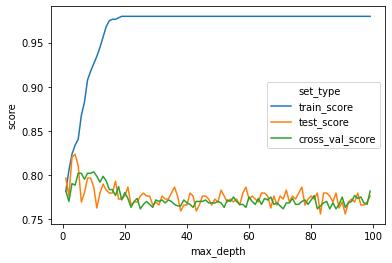

In [292]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [293]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.802031
207,10,cross_val_score,0.803711


In [294]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [295]:
cross_val_score(clf,X_train,y_train, cv=5).mean()

0.805392156862745

In [296]:
cross_val_score(clf,X_test,y_test, cv=5).mean()

0.7864406779661016

In [297]:
from sklearn.model_selection import GridSearchCV 
#перебирает много моделй с заданными параметрами и выбирает лучший

In [298]:
clf = tree.DecisionTreeClassifier()

In [299]:
parametrs = {'criterion' : ["gini", "entropy"], "max_depth": range(1,30)}

In [300]:
grid_searchCV_clf = GridSearchCV(clf, parametrs, cv=5)

In [301]:
grid_searchCV_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [302]:
grid_searchCV_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [303]:
best_clf = grid_searchCV_clf.best_estimator_


In [304]:
best_clf.score(X_test,y_test)

0.7694915254237288

In [305]:
from sklearn.metrics import precision_score, recall_score

In [306]:
y_pred = best_clf.predict(X_test)

In [309]:
precision_score(y_test, y_pred)

0.7407407407407407

In [310]:
recall_score(y_test, y_pred)

0.6666666666666666

In [313]:
y_pred_probability = best_clf.predict_proba(X_test)
y_pred_probability

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

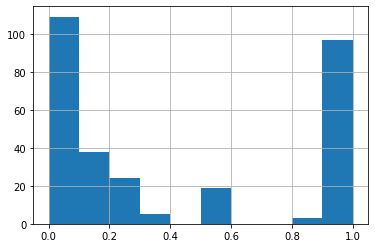

In [314]:
pd.Series(y_pred_probability[:,1]).hist()

In [320]:
y_pred = np.where(y_pred_probability[:,1] > 0.2, 1, 0 )

In [321]:
precision_score(y_test, y_pred)

0.6756756756756757

### Задачи


In [218]:
test_iris = pd.read_csv('test_iris.csv')
train_iris = pd.read_csv('train_iris.csv')

In [219]:
test_iris = test_iris.drop('Unnamed: 0', axis=1)
train_iris = train_iris.drop('Unnamed: 0', axis=1)

In [220]:
X_train = train_iris.drop("species",axis=1)
Y_train = train_iris.species

In [221]:
X_test = test_iris.drop("species",axis=1)
Y_test = test_iris.species

In [222]:
# задача 

np.random.seed(0)
scores_data = pd.DataFrame()

In [223]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,Y_train)
    train_score = clf.score(X_train,Y_train)
    test_score = clf.score(X_test,Y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score]})
    
    scores_data = scores_data.append(temp_score_data)
    

In [224]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [225]:
scores_data_long = pd.melt(scores_data,id_vars='max_depth',
                           value_vars=['train_score','test_score'],
                           var_name='set_type',
                           value_name='score' )


In [226]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


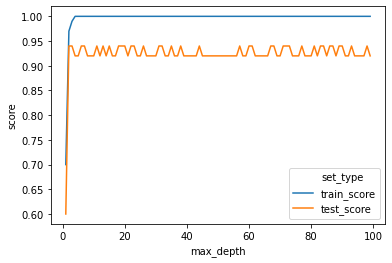

In [227]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

#### Задача 

In [228]:
dogs_n_cats_data = pd.read_csv('dogs_n_cats.csv')

In [229]:
dogs_n_cats_data = pd.get_dummies(dogs_n_cats_data) #заменяем номинативные переменные числами

In [230]:
dogs_n_cats_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1


In [231]:
dogs_n_cats_data.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид_котик             0
Вид_собачка           0
dtype: int64

In [232]:
X_train = dogs_n_cats_data.drop(['Вид_котик','Вид_собачка'], axis=1)

In [233]:
y_train = dogs_n_cats_data[['Вид_котик','Вид_собачка']]

In [234]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [235]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [236]:
clf.score(X_train,y_train)

1.0

In [237]:
a = pd.DataFrame(clf.predict(X_train))

In [238]:
a = a.rename(columns= {0:'Dogs',1:'Cats'})

In [239]:
a.Dogs.sum()

500

In [240]:
df = pd.read_json("dataset_209691_15 (2).txt")

In [241]:
df.shape

(100, 5)

In [242]:
b = pd.DataFrame(clf.predict(df))

In [243]:
b = b.rename(columns= {0:'Cats',1:'Dogs'})

In [244]:
b.Dogs.sum()

48

In [245]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [246]:
df = pd.read_csv('songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [247]:
df1 = df.drop(['length','commas','exclamations','colons','hyphens'], axis=1)

In [248]:
df1['length'] = df1.lyrics.str.len()
df1['commas'] = df1.lyrics.str.count(',')
df1['exclamations'] = df1.lyrics.str.count('!')
df1['colons'] = df1.lyrics.str.count(':')
df1['hyphens'] = df1.lyrics.str.count('-')

In [249]:
X = df1.drop(['length','year','genre','artist','lyrics','song'], axis=1)

In [250]:
X = pd.get_dummies(X)

In [251]:
y = df1.artist
y = pd.get_dummies(y)

In [252]:
y.head()

,abba,blind-guardian,gangstarr
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state = 0)

In [254]:
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=40)

In [255]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
predictions = clf.predict(X_test)
precision = precision_score(y_test,predictions, average='micro')
precision

0.575

In [256]:
predictions = clf.predict(X_test)

In [257]:
precision = precision_score(y_test,predictions, average='micro')

In [258]:
precision

0.575

In [259]:
cross_val_score(clf,X_train,y_train, cv=5).mean()

0.6148148148148149